<a href="https://colab.research.google.com/github/Muhammad-Kashif-javed/Deep-Dive-Python-Colab-Notebook-/blob/main/Pandas'%2B_ploting_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas
Pandas  is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
# Statistics
it is a field of math that deals with the collection, analysis interpretation, presentation and oganization of data.
# Descriptive statistics
Mean, median, mode, range, standard deviation and variance.
# Inferential statistics
hypothesis testing, confidence intervals, p-value, T-test\ ANOVA test and regression analysis.
# Probability Distribution
Normal distribution , Binomial Distribution and poisson distribution.

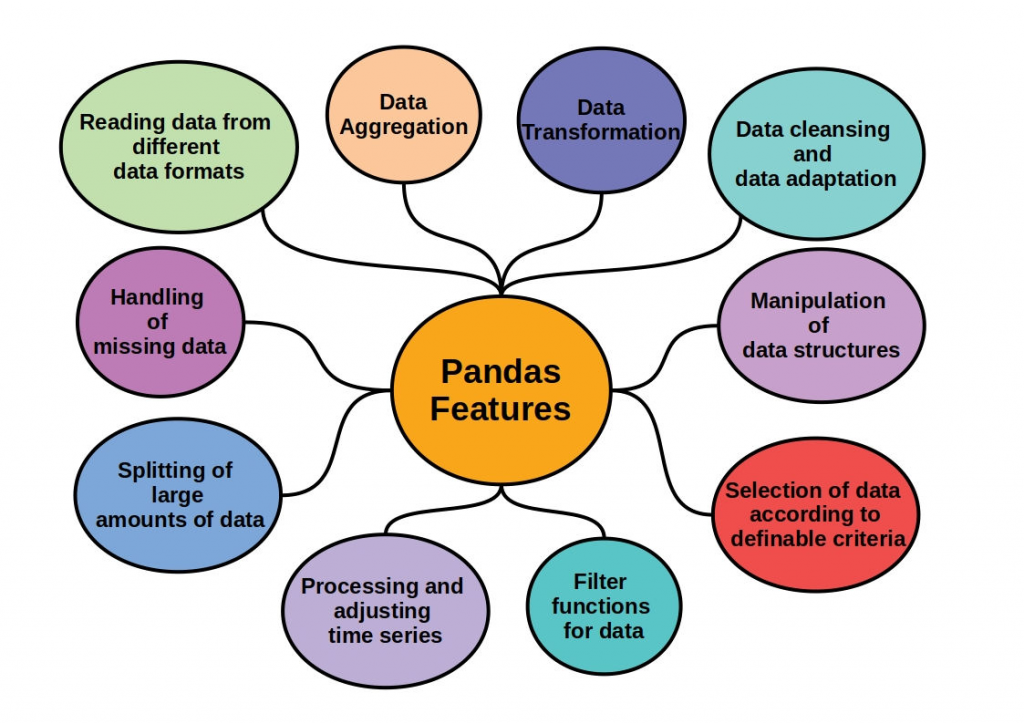

# Pandas Main Data Structures
1. DataFrame  
2. Series

# Series
A Series is a one-dimensional labeled array.

Think of it like a single column in a table (like an Excel column).

It has two main components:

Index (row labels)

Values (data)

In [2]:
import pandas as pd

a = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
a


,0
a,10
b,20
c,30


# 🧾 DataFrame
A DataFrame is a two-dimensional labeled data structure.

It’s like a table with rows and columns, or a collection of Series sharing the same index.

In [3]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}

df = pd.DataFrame(data)
print(df)


      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35


In [4]:
data

{'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}

In [5]:
type(data)

dict

In [6]:
df

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [9]:
type(df)

pandas.core.frame.DataFrame

#  import different types of files using pandas in Python

In [ ]:
# ✅ read_csv() is used for importing CSV (Comma-Separated Values) files.

import pandas as pd

df = pd.read_csv('/content/heart.csv')

In [ ]:
# ✅ read_excel() is used for Excel files. You can also specify a sheet name if needed.
import pandas as pd
df = pd.read_excel('file_name.xlsx', sheet_name='Sheet1')


In [ ]:
# ✅ You can use read_csv() with a delimiter argument for custom separators.
import pandas as pd
df = pd.read_csv('file_name.txt', delimiter='\t')  # For tab-separated


In [ ]:
# ✅ read_json() is used to read data from a JSON (JavaScript Object Notation)file.
import pandas as pd
df = pd.read_json('file_name.json')


In [10]:
import pandas as pd
import numpy as np

# For reproducibility
np.random.seed(42)

n = 100

# 1) Generate columns
genders  = np.random.choice(['Male', 'Female'], size=n)
cities   = np.random.choice(['Lahore', 'Karachi', 'Islamabad', 'Peshawar', 'Quetta'], size=n)
subjects = np.random.choice(['Math', 'English', 'Physics', 'Chemistry', 'Biology'], size=n)
marks    = np.random.normal(loc=60, scale=20, size=n)  # around 70±10

# 2) Inject a few extreme outliers
out_idx = np.random.choice(n, size=3, replace=False)
marks[out_idx] = [150, -20, 130]  # two high outliers and one negative

# 3) Admission status
admission = np.where(np.random.rand(n) > 0.7, 'Yes', 'No')

# 4) Assemble into DataFrame
df = pd.DataFrame({
    'Gender'   : genders,
    'City'     : cities,
    'Marks'    : marks,
    'Subject'  : subjects,
    'Admission': admission
})

# 5) Randomly introduce ~5% missing values per column
for col in df.columns:
    missing_count = int(0.07 * n)
    missing_indices = np.random.choice(df.index, size=missing_count, replace=False)
    df.loc[missing_indices, col] = np.nan

# 6) Inspect the first few rows
print(df.head())


   Gender      City      Marks    Subject Admission
0    Male   Karachi  74.690021        NaN        No
1  Female   Karachi  40.910055    Physics       Yes
2    Male  Peshawar  44.976412        NaN       Yes
3    Male   Karachi  37.391439  Chemistry       NaN
4    Male   Karachi  75.399547    Physics        No


In [ ]:
df

,Gender,City,Marks,Subject,Admission
0,Male,Karachi,74.690021,NaN,No
1,Female,Karachi,40.910055,Physics,Yes
2,Male,Peshawar,44.976412,NaN,Yes
3,Male,Karachi,37.391439,Chemistry,NaN
4,Male,Karachi,75.399547,Physics,No
...,...,...,...,...,...
95,Female,Lahore,34.401605,English,Yes
96,NaN,NaN,55.252161,English,No
97,Female,Islamabad,97.440114,English,NaN
98,Female,Lahore,59.611157,Physics,No


In [11]:
df.columns

Index(['Gender', 'City', 'Marks', 'Subject', 'Admission'], dtype='object')

# pre-processing and EDA (Exploratory Data Analysis) are not the same thing, although they are related and often performed together in the data analysis process.

# Pre-processing:
Pre-processing involves cleaning, transforming, and preparing the data for analysis. This step includes:

1. Handling missing values
2. Data normalization
3. Feature scaling
4. Removing outliers

# EDA (Exploratory Data Analysis):
EDA is the process of exploring and understanding the underlying structure and patterns in the data. This step includes:

1. Visualizing data distributions
2. Identifying relationships between variables
3. Detecting outliers and anomalies
4. Gaining insights into the data

While pre-processing prepares the data for analysis, EDA helps you understand the data and identify potential issues or opportunities.

# 1 Pre-processing:
Pre-processing involves cleaning, transforming, and preparing the data for analysis. This step includes:

1. Handling missing values
2. Data normalization
3. Feature scaling
4. Removing outliers

In [12]:
df.head(10)

,Gender,City,Marks,Subject,Admission
0,Male,Karachi,74.690021,NaN,No
1,Female,Karachi,40.910055,Physics,Yes
2,Male,Peshawar,44.976412,NaN,Yes
3,Male,Karachi,37.391439,Chemistry,NaN
4,Male,Karachi,75.399547,Physics,No
5,Female,Peshawar,85.367790,Math,No
6,NaN,Peshawar,NaN,Chemistry,No
7,Male,Lahore,78.810712,Math,No
8,NaN,Quetta,42.647178,NaN,No
9,Female,Quetta,62.917237,English,NaN


In [13]:
df.tail()

,Gender,City,Marks,Subject,Admission
95,Female,Lahore,34.401605,English,Yes
96,NaN,NaN,55.252161,English,No
97,Female,Islamabad,97.440114,English,NaN
98,Female,Lahore,59.611157,Physics,No
99,Male,Quetta,41.348167,Biology,Yes


In [16]:
df.sample(3)    # sample Vs Popoulation  (population all data e.g all cities and sample we take random some data )

,Gender,City,Marks,Subject,Admission
79,Female,Peshawar,47.428605,Math,No
37,Male,Peshawar,-20.000000,English,No
5,Female,Peshawar,85.367790,Math,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     93 non-null     object 
 1   City       93 non-null     object 
 2   Marks      93 non-null     float64
 3   Subject    93 non-null     object 
 4   Admission  93 non-null     object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [18]:
df.describe()

,Marks
count,93.000000
mean,63.681920
std,24.616139
min,-20.000000
25%,45.385172
50%,62.571020
75%,78.810712
max,150.000000


In [19]:
df.isnull()

,Gender,City,Marks,Subject,Admission
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,True,False
3,False,False,False,False,True
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,True,True,False,False,False
97,False,False,False,False,True
98,False,False,False,False,False


In [20]:
df.isnull().sum()

,0
Gender,7
City,7
Marks,7
Subject,7
Admission,7


In [21]:
df.isnull().sum().sum()

np.int64(35)

# 3. Missing‑Value Handling


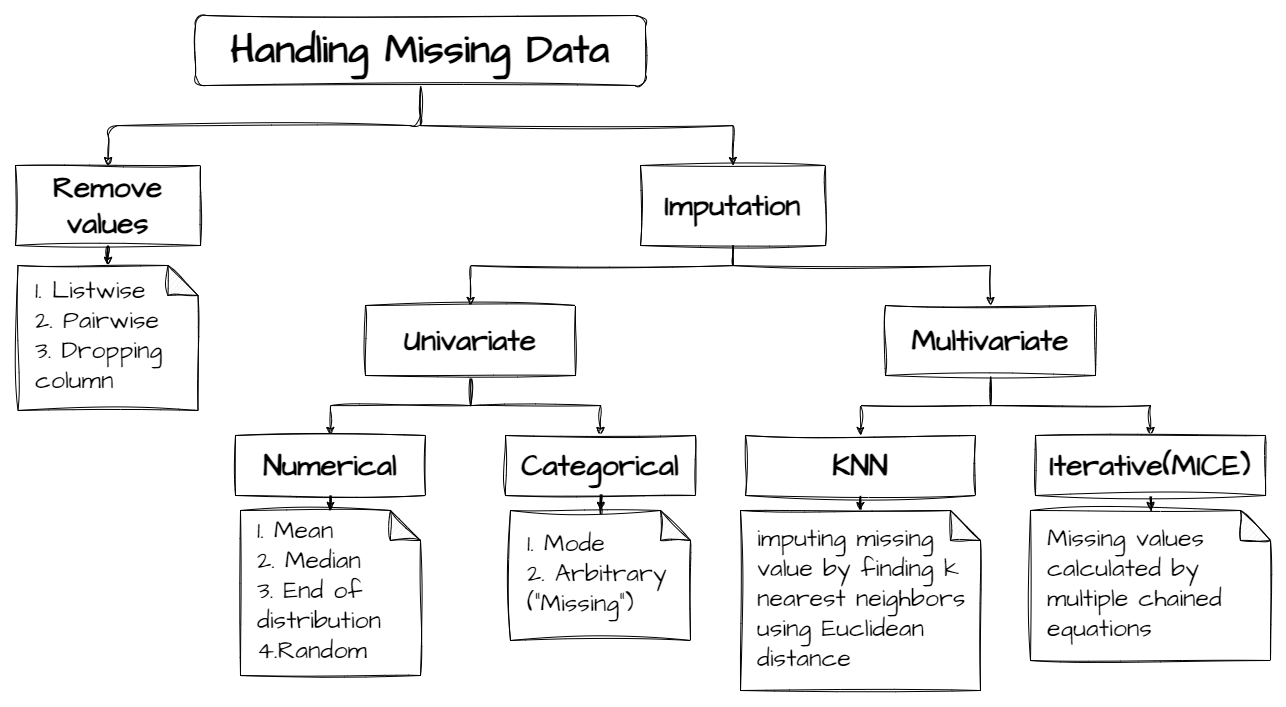

In [22]:
data = df.copy()

In [23]:
# Drop any row with ≥1 missing
df_clean = df.dropna()



In [24]:
# Drop only if a particular column is missing
df_clean = df.dropna(subset=['Marks', 'Admission'])

In [25]:
df_clean.isnull().sum()

,0
Gender,6
City,7
Marks,0
Subject,7
Admission,0


In [26]:
df_clean.isnull().sum()

,0
Gender,6
City,7
Marks,0
Subject,7
Admission,0


# Simple Imputation
2.1 Constant / “Flag” Imputation
– Replace missings with a placeholder (e.g. "Unknown" or -1)
– Keeps row count intact and signals “missing” explicitly

In [44]:
df['City']= df['City'    ].fillna('unknown', inplace=True)
#df['Marks'   ].fillna(-1, inplace=True)


In [45]:
df['City'].isnull().sum()

np.int64(100)

In [46]:
df.isnull().sum()

,0
Gender,7
City,100
Marks,7
Subject,7
Admission,7


In [47]:
df['City']

,City
0,None
1,None
2,None
3,None
4,None
...,...
95,None
96,None
97,None
98,None


#  Mean / Median / Mode Imputation
– Numeric → use the column’s mean or median

– Categorical → use the mode

In [48]:
# Numeric
df['Marks'].fillna(df['Marks'].mean(), inplace=True)

# Categorical
#df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


<ipython-input-48-ae2851326f55>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marks'].fillna(df['Marks'].mean(), inplace=True)


In [49]:
df['Marks'].isna().sum()

np.int64(0)

# 3. Forward/Backward Fill (Time‑Series or Ordered Data)
– Carries last non‑null value forward (ffill) or next backward (bfill)

– Useful when rows have a natural order (e.g. measurements over time)

In [50]:
df.sort_index(inplace=True)
df['Marks'].ffill(inplace=True)   # or df['Marks'].bfill()


<ipython-input-50-9f31cae18107>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marks'].ffill(inplace=True)   # or df['Marks'].bfill()


# 4. Interpolation
– Fits a simple curve between known points to fill numeric gaps

– Options: linear, polynomial, spline, etc.

# 5. K‑Nearest Neighbors (KNN) Imputation
– Finds “neighbors” in feature‑space and imputes the average (numeric) or mode (categorical)


– Captures local structure better than global mean/median

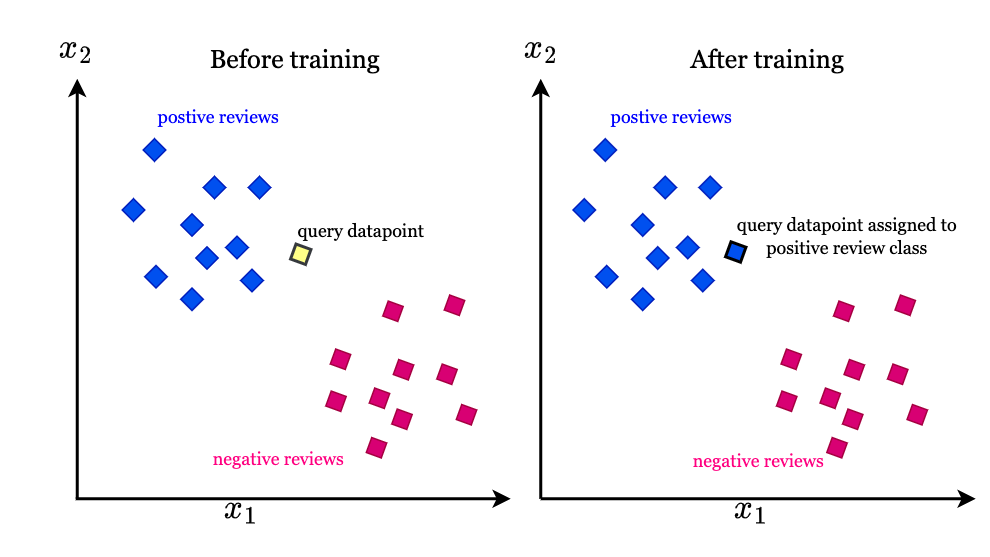

In [51]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
df_numeric = pd.DataFrame(imp.fit_transform(df[['Marks']]), columns=['Marks'])


# 6. Dropping Columns
If a column has too much missing data (e.g. >50–60%), it may be safer to drop it completely:

In [ ]:
""" thresh sets a threshold for the minimum number of non-missing values required for the column to be kept.
 0.4*len(df) calculates this threshold. len(df) gives the total number of rows in the DataFrame, and multiplying
 by 0.4 means the column needs at least 40% of its values to be non-missing.
 If it has more than 60% missing, it will be dropped."""

df.drop(columns=['Subject'], thresh=0.4*len(df), inplace=True)

# Feature Scaling
Feature Scaling is a technique to standardize the independent features present in the data.



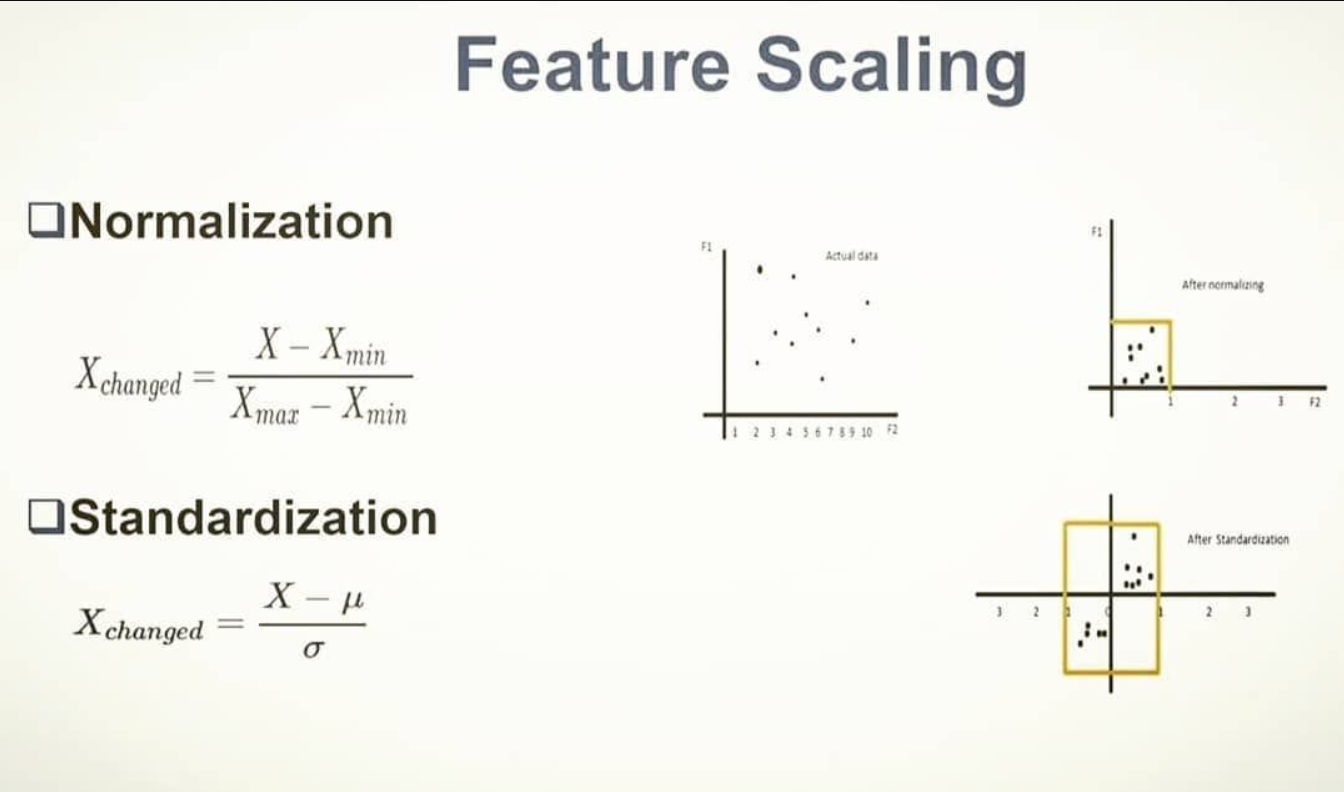

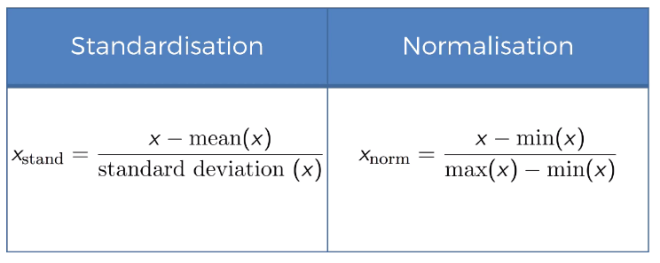

# Standard deviation tells you how “spread out” the values in a data set are around their mean (average). معیاری انحراف

A small standard deviation means most values lie close to the mean.

A large standard deviation means values are more widely dispersed.

# StandardScaler(): centers Marks to zero mean and unit variance

# Alternatively, you could use MinMaxScaler() to rescale into [0,1].

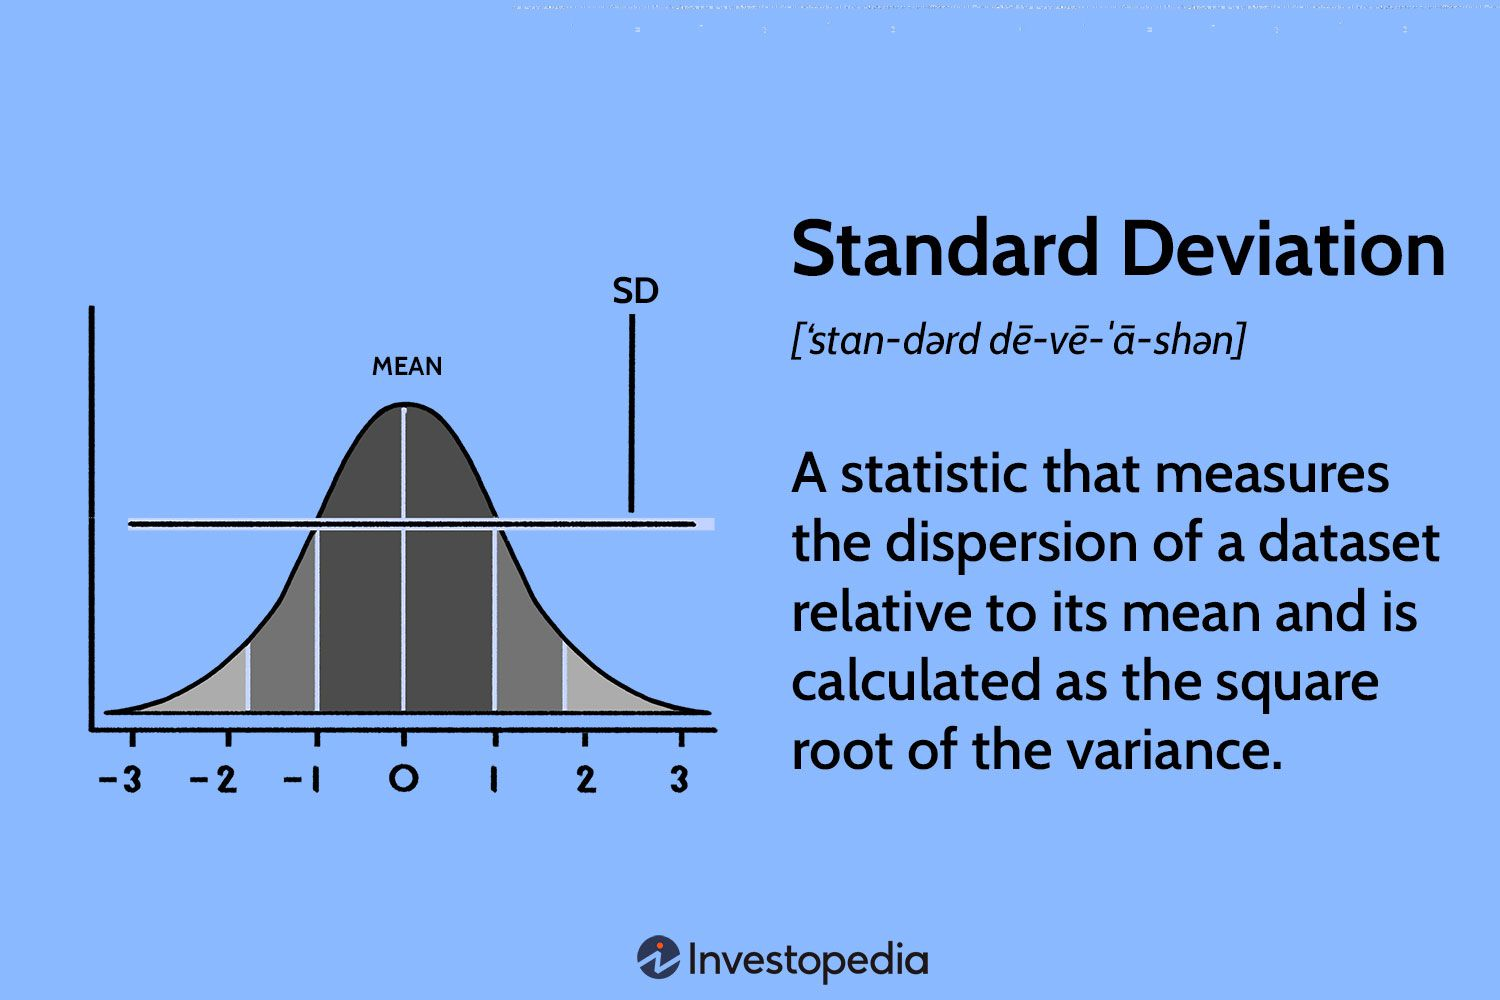

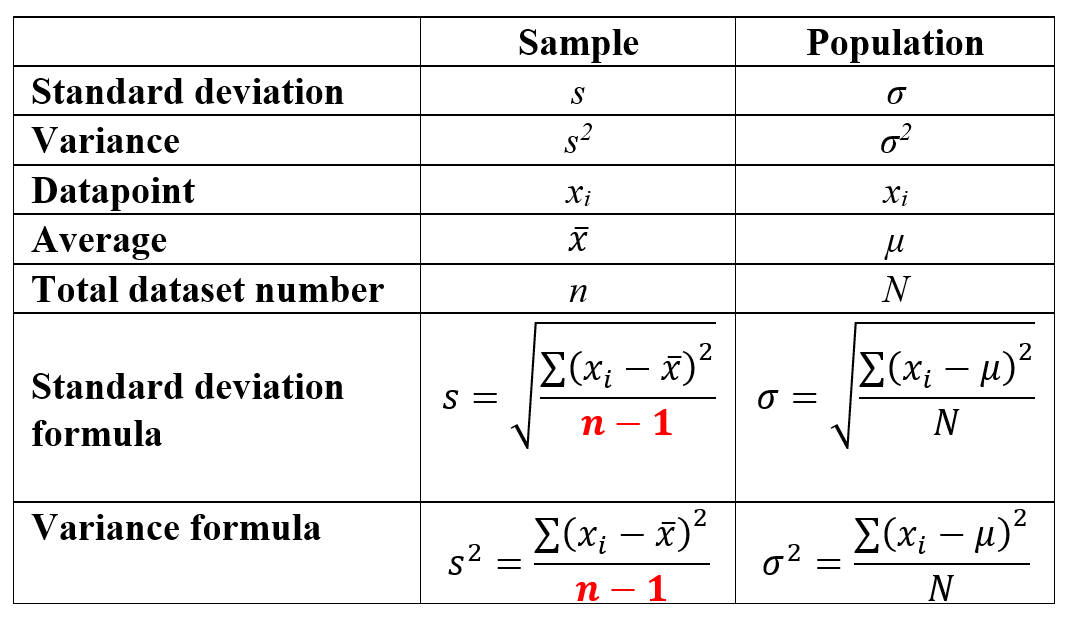

In [ ]:
# 1. Standardization (z‑score scaling)
# Scales features to have mean = 0 and std = 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)  # X: array-like, shape (n_samples, n_features)


In [ ]:
# 2. Min–Max Scaling (normalization)
# Scales features to lie in a given range, usually [0, 1]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled  = scaler.fit_transform(data)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
data = np.array([2, 4, 4, 4, 5, 5, 7, 9])

# Calculate mean and variance
mean = np.mean(data)
variance = np.mean((data - mean)**2)

# Print mean and variance
print(f"Data: {data}")
print(f"Mean (μ): {mean}")
print(f"Variance (σ²): {variance:.2f}")



Data: [2 4 4 4 5 5 7 9]
Mean (μ): 5.0
Variance (σ²): 4.00


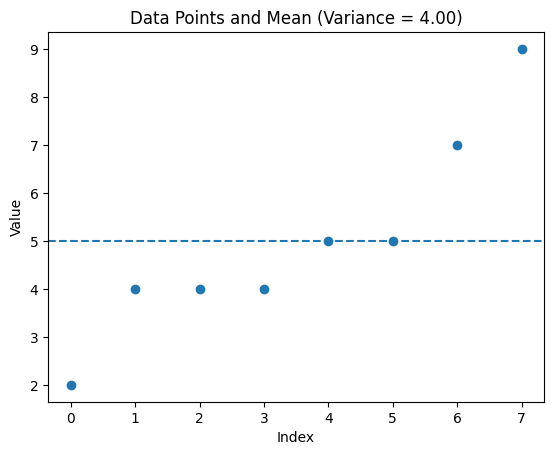

In [ ]:
# Plot 1: Data points with mean line
plt.figure()
plt.scatter(range(len(data)), data)
plt.axhline(mean, linestyle='--')
plt.title(f'Data Points and Mean (Variance = {variance:.2f})')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()



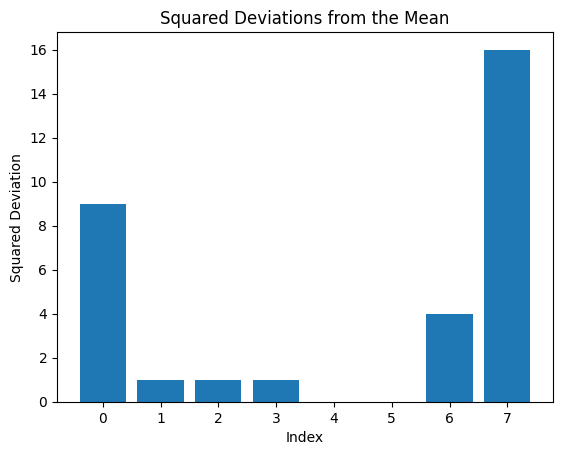

In [ ]:

# Plot 2: Squared deviations from the mean
squared_deviations = (data - mean) ** 2
plt.figure()
plt.bar(range(len(data)), squared_deviations)
plt.title('Squared Deviations from the Mean')
plt.xlabel('Index')
plt.ylabel('Squared Deviation')
plt.show()

# 4. Outlier Detection & Treatment
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.

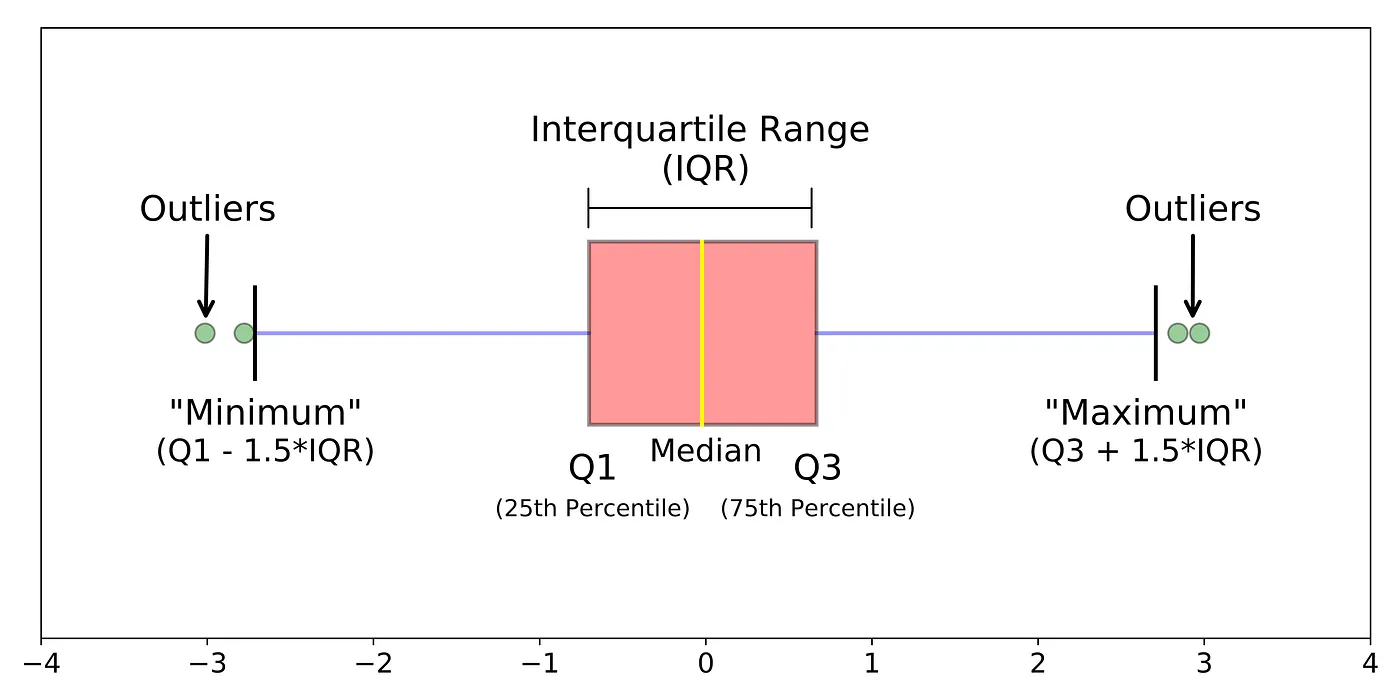

<Axes: >

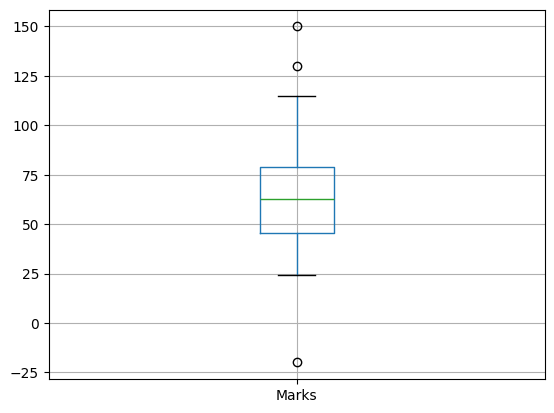

In [ ]:
# Visual Methods
df.boxplot(column='Marks')


<Axes: >

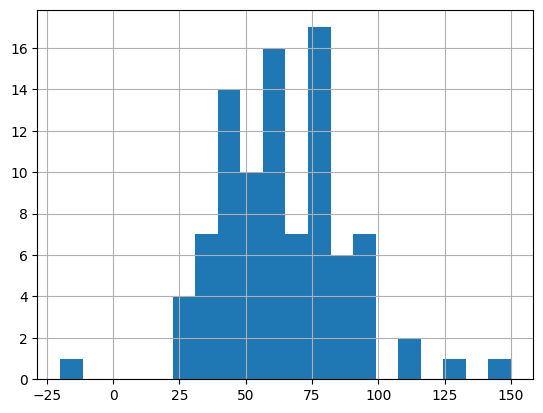

In [ ]:
# Histogram (Look for long tails or isolated bins.)
df['Marks'].hist(bins=20)


<Axes: xlabel='Subject', ylabel='Marks'>

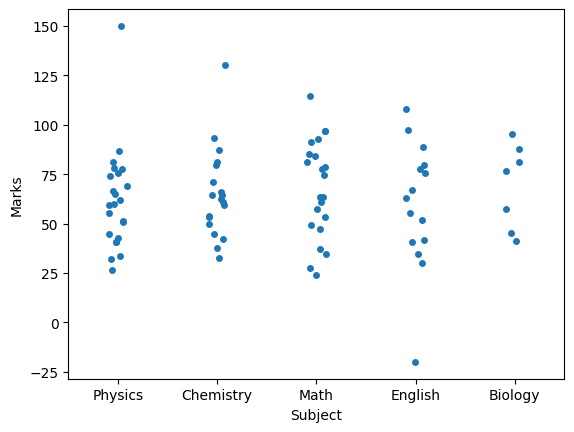

In [ ]:
# Scatter / Strip Plot (if you compare two variables)
import seaborn as sns
sns.stripplot(x='Subject', y='Marks', data=df)


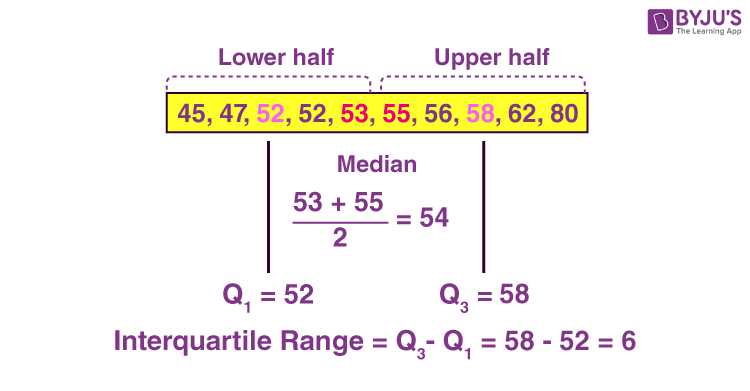

# Statistical Methods

In [ ]:
# IQR-based
Q1 = df['Marks'].quantile(0.25)
Q3 = df['Marks'].quantile(0.75)
IQR = Q3 - Q1
mask_iqr = (df['Marks'] < Q1 - 1.5*IQR) | (df['Marks'] > Q3 + 1.5*IQR)

In [ ]:
mask_iqr

,Marks
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


In [ ]:
mask_iqr.sum()

np.int64(3)

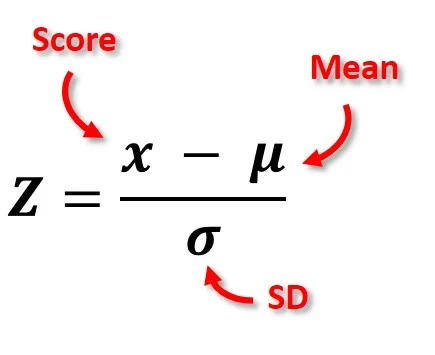

In [ ]:
# Z-score based
from scipy import stats
z_scores = np.abs(stats.zscore(df['Marks'].dropna()))
mask_z   = z_scores > 3

In [ ]:
mask_z

,Marks
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


In [ ]:
mask_z.sum()

np.int64(2)

# 2. Handling Outliers
Once you’ve flagged outliers (e.g. via mask_iqr or outlier_if == -1), here are your main options:



In [ ]:
# simple remove the irq
df_clean = df[~mask_iqr]      # drop IQR outliers


# Imputation
Use when: you believe extreme values are errors rather than true variation.



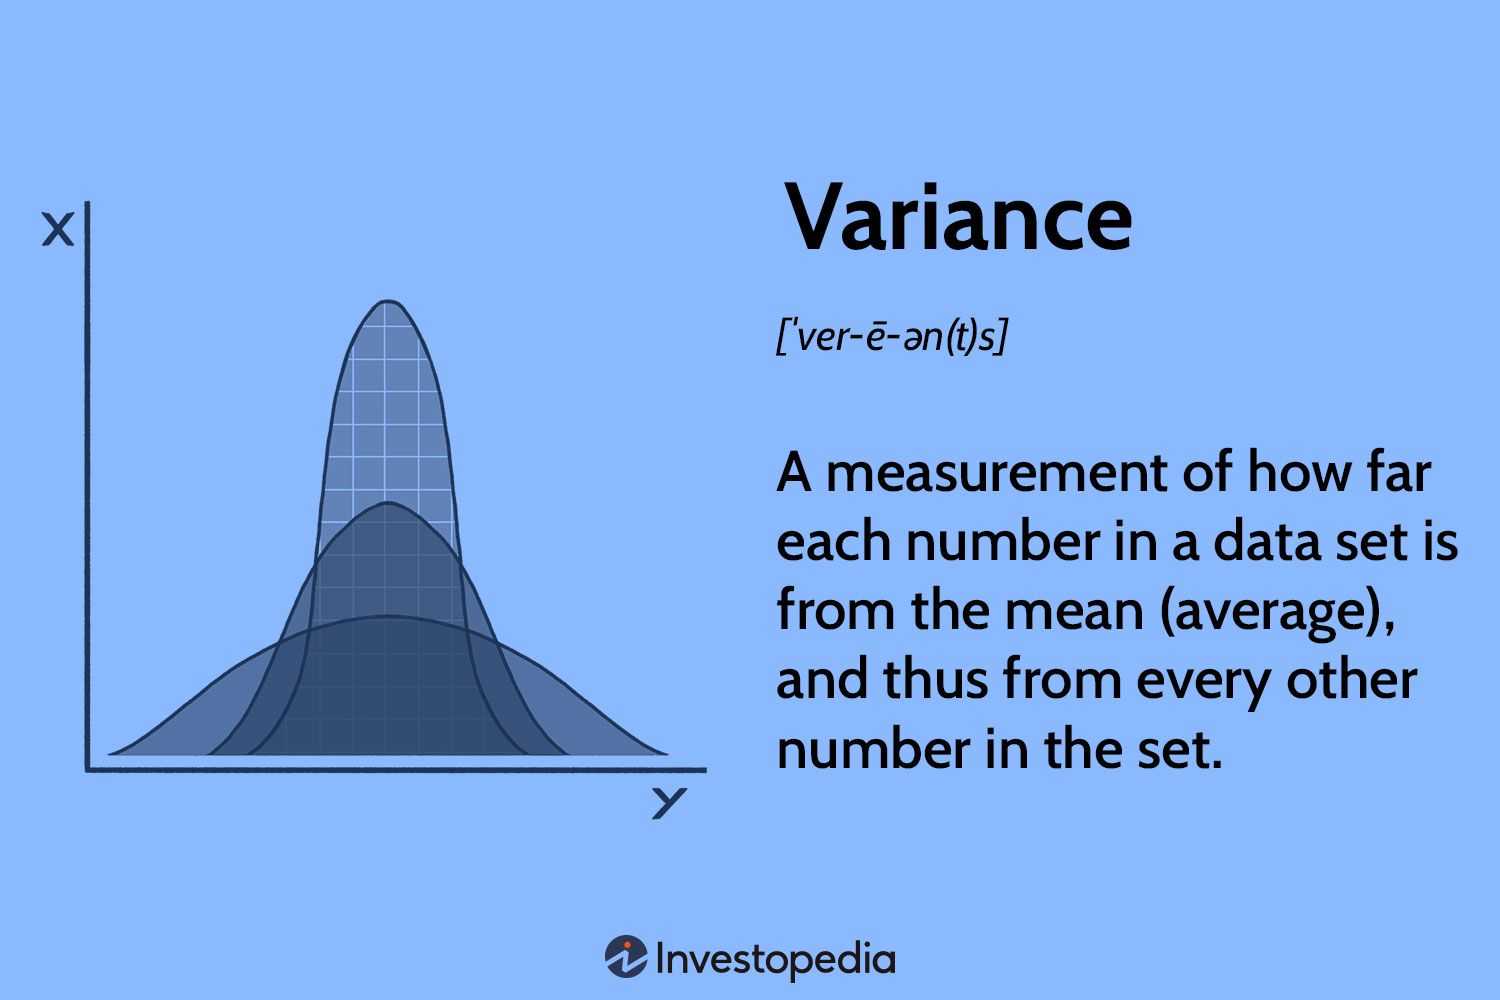

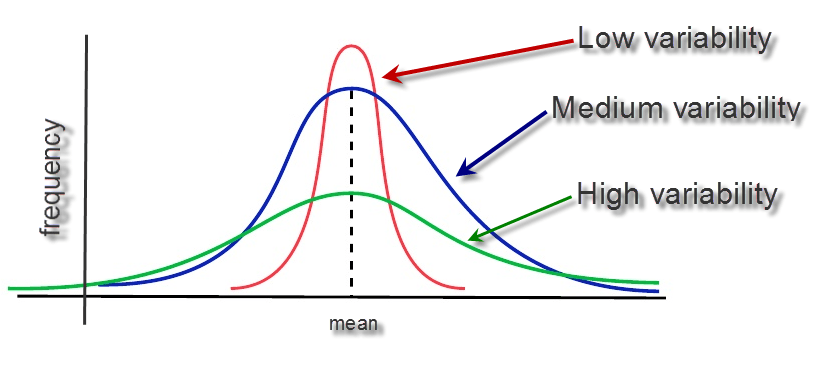

In [ ]:
# Replace outliers with a summary statistic:

median = df['Marks'].median()
df.loc[mask_iqr, 'Marks'] = median


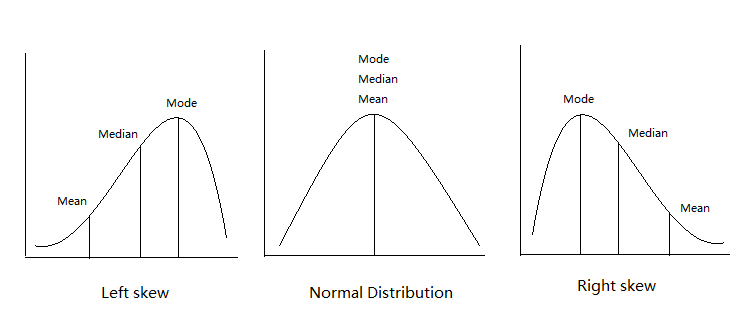

# Transformation
Reduce skew and pull in extremes

Other options: square‑root, Box‑Cox.



In [ ]:
df['Marks_log'] = np.log1p(df['Marks'] - df['Marks'].min() + 1)


# 3. Categorical “Outliers”
For columns like Gender, City, Subject, Admission, “outliers” appear as rare categories:



In [ ]:
df['Subject'].value_counts(normalize=True)


,proportion
Subject,
Math,0.258065
Physics,0.247312
Chemistry,0.225806
English,0.172043
Biology,0.096774


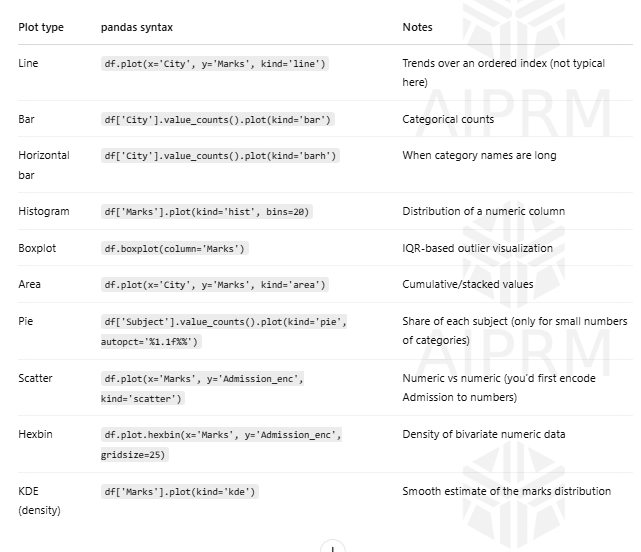

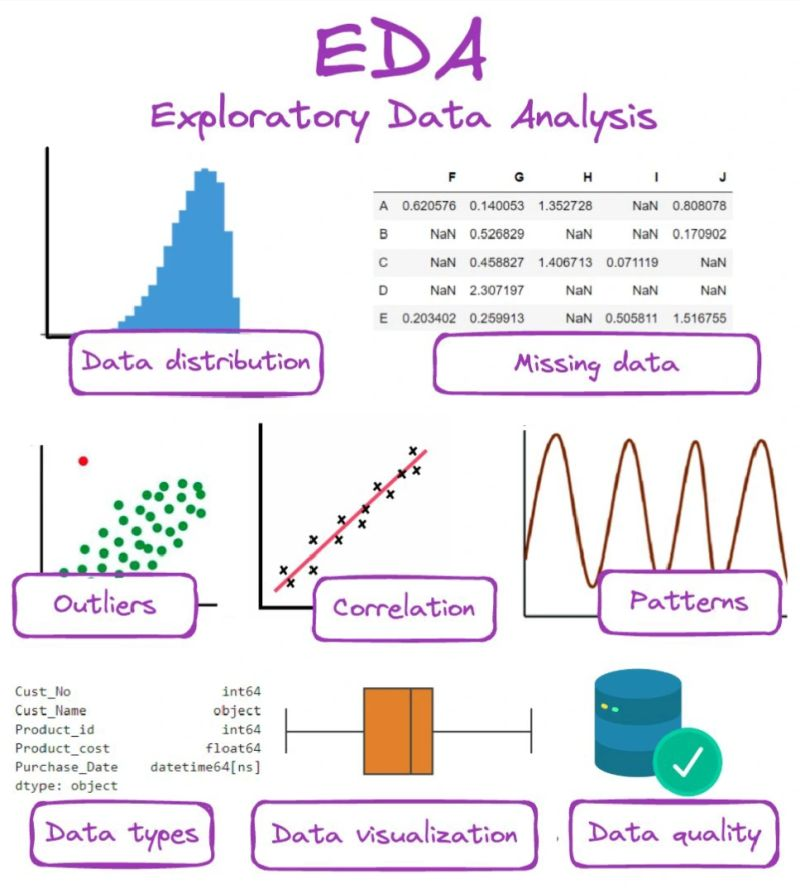

# Matplotlib: Visualization with Python
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.



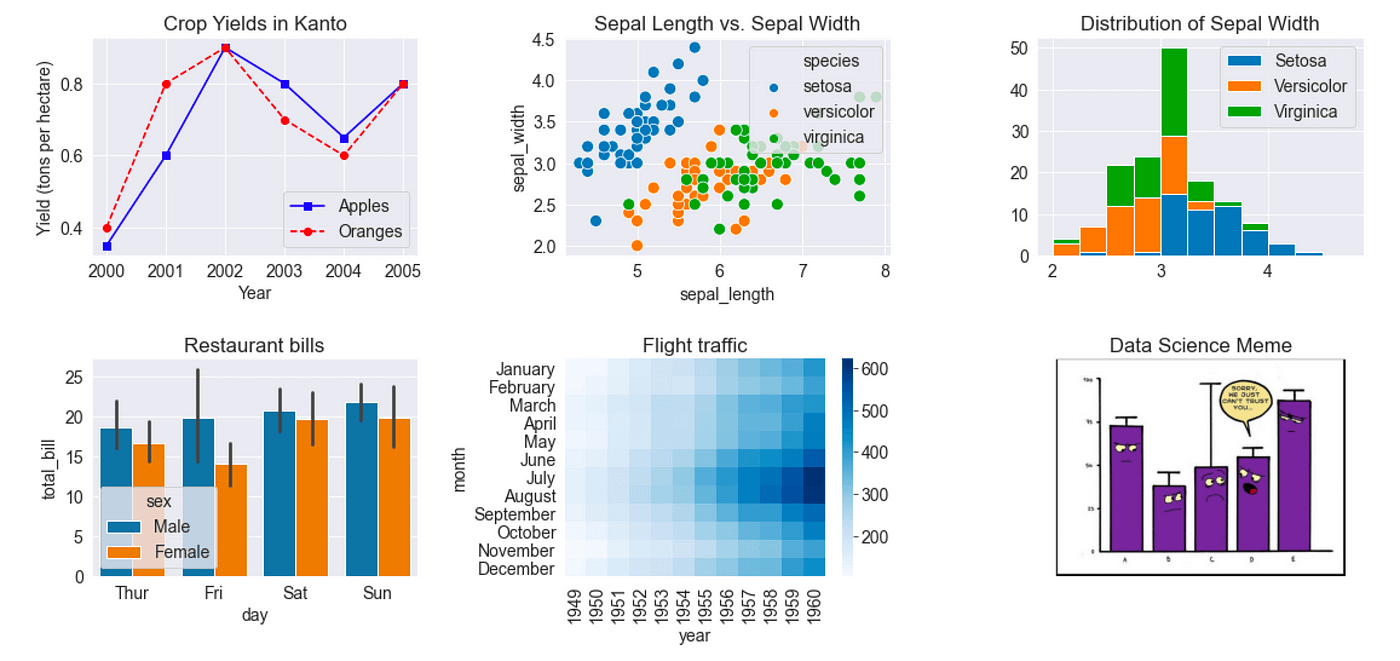

In [ ]:
data.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.isna().sum()

,0
Gender,7
City,7
Marks,7
Subject,7
Admission,7


In [ ]:
# Remove the missing values
data.dropna(inplace=True)


In [ ]:
data.isnull().sum()

,0
Gender,0
City,0
Marks,0
Subject,0
Admission,0


(68, 5)

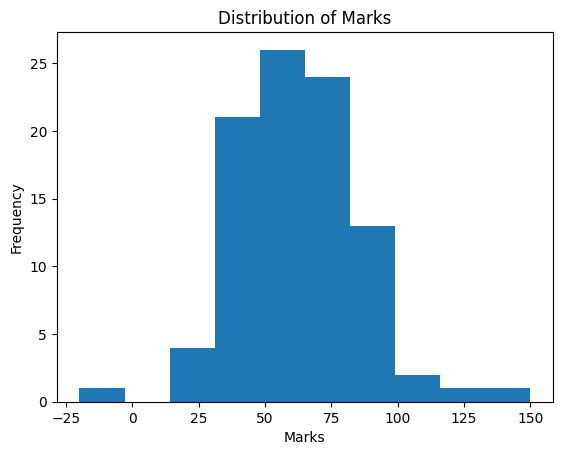

In [ ]:
# 1. Histogram of Marks
plt.figure()
plt.hist(df['Marks'].dropna())
plt.title('Distribution of Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()

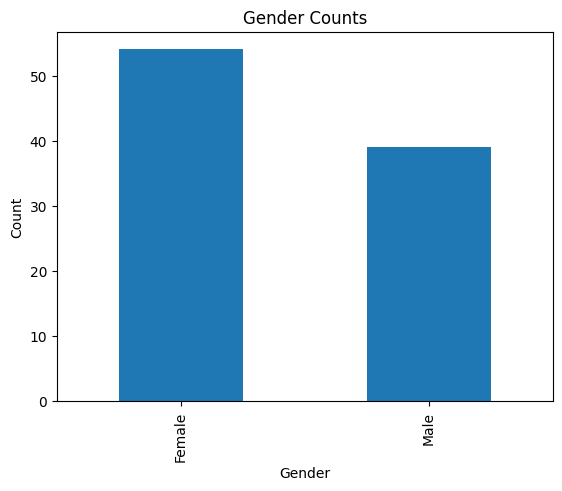

In [ ]:
# 2. Bar chart of Gender counts
plt.figure()
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='None', ylabel='Marks'>

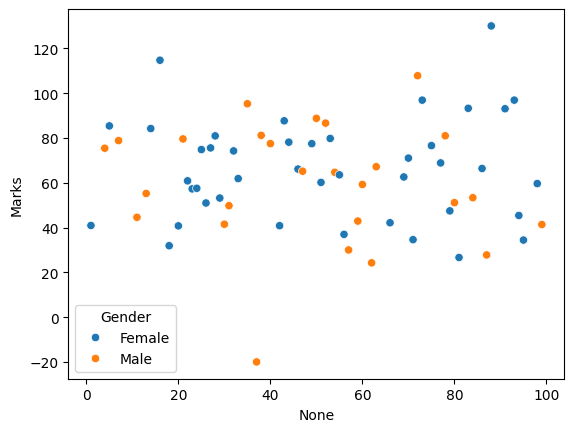

In [ ]:
sns.scatterplot(x=data.index, y=data['Marks'], hue=data['Gender'])

<Figure size 640x480 with 0 Axes>

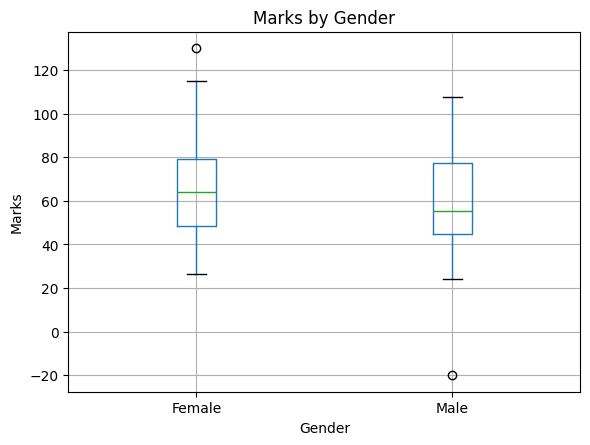

In [ ]:
# 3. Boxplot: Marks by Gender
plt.figure()
df.boxplot(column='Marks', by='Gender')
plt.title('Marks by Gender')
plt.suptitle('')
plt.ylabel('Marks')
plt.show()

<Figure size 640x480 with 0 Axes>

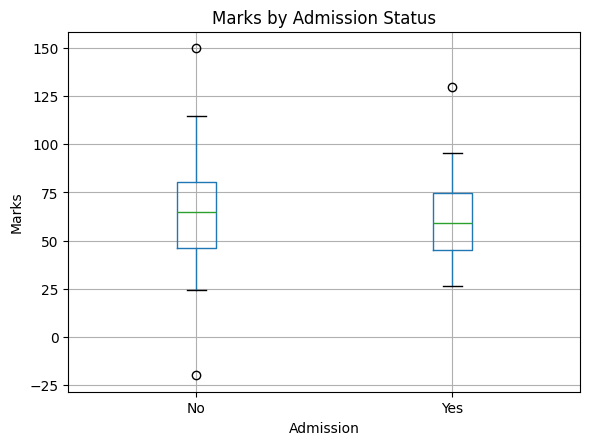

In [ ]:
# 4. Boxplot: Marks by Admission Status
plt.figure()
df.boxplot(column='Marks', by='Admission')
plt.title('Marks by Admission Status')
plt.suptitle('')
plt.ylabel('Marks')
plt.show()

In [ ]:
# 5. Outlier detection based on IQR
Q1 = df['Marks'].quantile(0.25)
Q3 = df['Marks'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Marks'] < Q1 - 1.5 * IQR) | (df['Marks'] > Q3 + 1.5 * IQR)]

print("\nOutliers based on IQR:")
print(outliers)


Outliers based on IQR:
    Gender      City  Marks    Subject Admission
37    Male  Peshawar  -20.0    English        No
65     NaN    Quetta  150.0    Physics        No
88  Female    Lahore  130.0  Chemistry       Yes


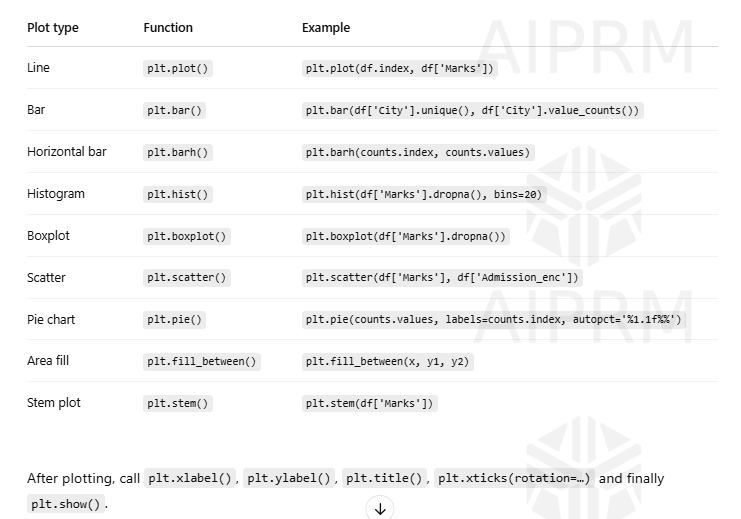

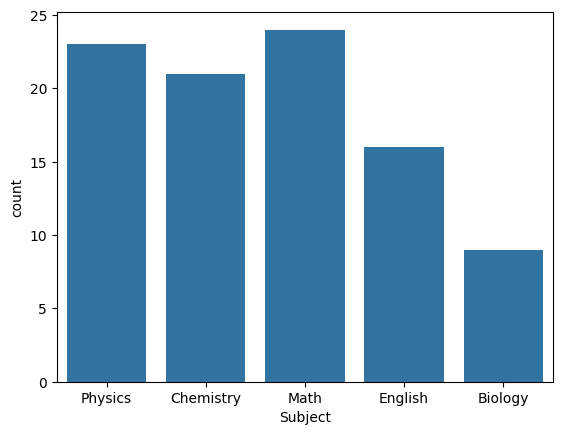

In [ ]:
import seaborn as sns
ax = sns.countplot(x='Subject', data=df)
# then use ax.patches to annotate low bars similarly


In [ ]:
df.columns

Index(['Gender', 'City', 'Marks', 'Subject', 'Admission'], dtype='object')

In [ ]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

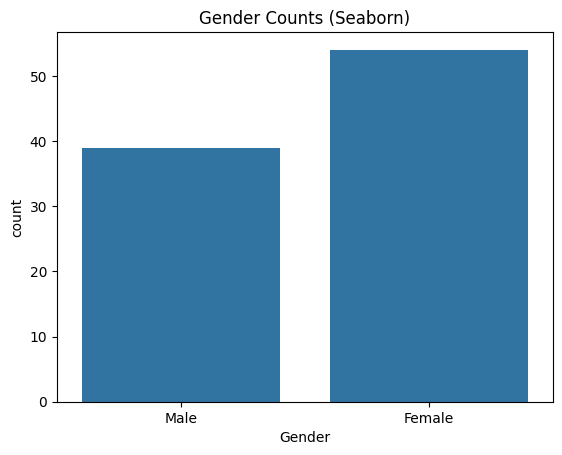

In [ ]:
# 2. Seaborn countplot for Gender
sns.countplot(x='Gender', data=df)
plt.title('Gender Counts (Seaborn)')
plt.show()

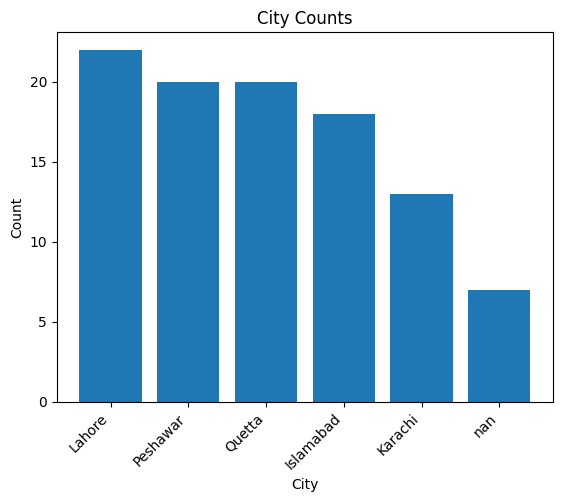

In [ ]:
# 3. Matplotlib bar chart for City counts
counts_city = df['City'].value_counts(dropna=False)
plt.bar(counts_city.index.astype(str), counts_city.values)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Counts')
plt.xticks(rotation=45, ha='right')
plt.show()

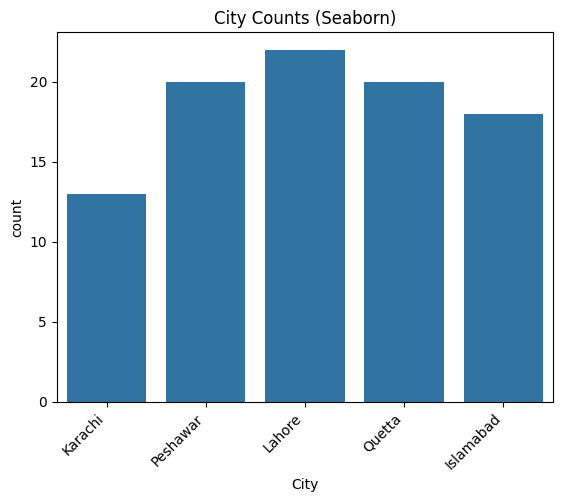

In [ ]:
# 4. Seaborn countplot for City
sns.countplot(x='City', data=df)
plt.title('City Counts (Seaborn)')
plt.xticks(rotation=45, ha='right')
plt.show()

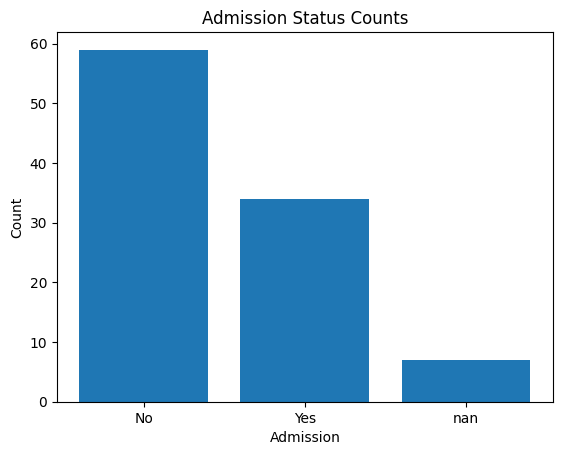

In [ ]:
# 7. Matplotlib bar chart for Admission counts
counts_adm = df['Admission'].value_counts(dropna=False)
plt.bar(counts_adm.index.astype(str), counts_adm.values)
plt.xlabel('Admission')
plt.ylabel('Count')
plt.title('Admission Status Counts')
plt.show()

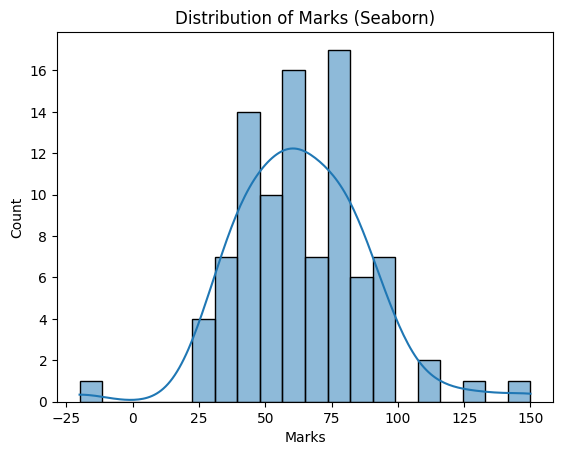

In [ ]:
# 10. Seaborn histplot for Marks with KDE
sns.histplot(df['Marks'], bins=20, kde=True)
plt.title('Distribution of Marks (Seaborn)')
plt.show()

<Axes: ylabel='Density'>

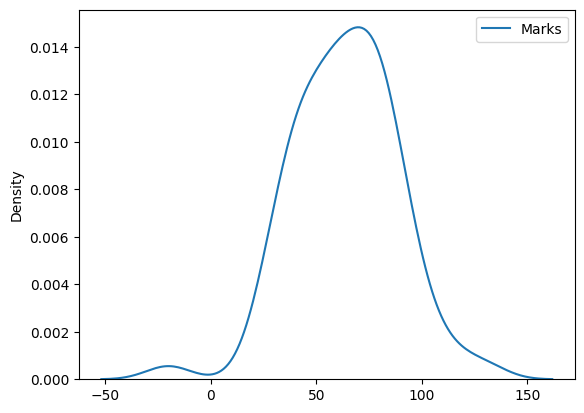

In [ ]:
#  Seaborn library to create a Kernel Density Estimation (KDE) plot.
sns.kdeplot(data)

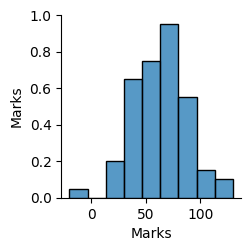

In [ ]:
import seaborn as sns
sns.pairplot(data)


array([[<Axes: title={'center': 'Marks'}>]], dtype=object)

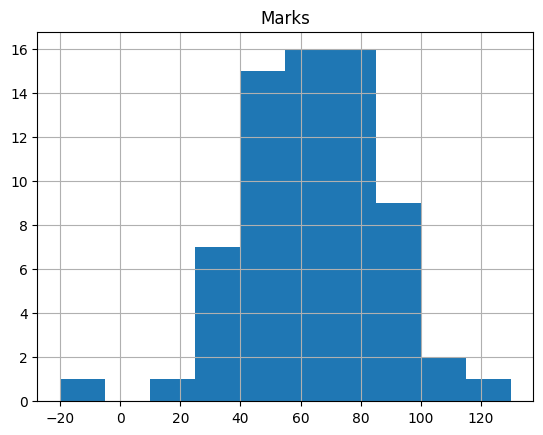

In [ ]:
data.hist()


# **Assignment: Data Preprocessing & Exploratory Data Analysis Project**  

---

### 📋 Objectives  
1. **Data Preprocessing**  
   - Clean and prepare your dataset.  
   - Handle missing values, normalize and scale features, and remove outliers.  
2. **Exploratory Data Analysis (EDA)**  
   - Visualize distributions, relationships, and anomalies.  
   - Summarize key patterns and insights.  

---

### 🔎 Task  
1. **Select a tabular dataset** of at least 200 rows and 5 columns (can be your own or from an open source).  
2. **Create a Jupyter Notebook** that:  
   - Loads the data.  
   - Performs **preprocessing**:  
     - Impute or drop missing values.  
     - Normalize or standardize numerical features.  
     - Detect and remove outliers (e.g. via IQR or Z‑score).  
   - Conducts **EDA**:  
     - Plots histograms, boxplots, scatterplots, heatmaps, etc.  
     - Calculates basic statistics (mean, median, std).  
     - Identifies interesting relationships, clusters, or anomalies.  
   - Writes clear markdown explanations between code cells.  

---

### 📤 Submission Instructions  
1. **Publish on LinkedIn**  
   - Share your notebook (as a GitHub Gist link or PDF).  
   - Post a short write‑up:  
     > “🚀 Completed my first Data Analysis project! Performed data preprocessing & EDA on [Dataset Name]. #DataScience”  
   - **Tag your teachers** so they can review: e.g. `@Ms....  
2. **Share on Slack**  
   - Post the same link in the `#assignments` channel.  
   - Add a brief note:  
     > “Here’s my preprocessing & EDA notebook for review.”  

> **Deadline:** 20-04-2025

Good luck, and have fun exploring your data! 🚀